In [ ]:
from notebooks import *
sg.init(app=None)

INFO     [16:39:56.839] [29727]  52 logging_/init_logging: {logging_yaml: None}

INFO     [16:39:57.144] [29727]  29 api.server_globals/init

INFO     [16:39:57.846] [29727]  31 api.server_globals/init: done

In [ ]:

def opt(*args, **kwargs):
    verbose_keys = ['cache', 'audio']
    verbose(*args, **{k: v for k, v in kwargs.items() if k in verbose_keys})
    par(**{k: v for k, v in kwargs.items() if k not in verbose_keys})

def par(**kwargs):
    """
    Usage:
        par(use=None)                         # No par, no progress bars (easier to see audio read/write and cache hit/miss)
        par(use='sync')                       # No par, cooperative progress bars (no lines printing over each other)
        par(use='dask', scheduler='threads')  # Par, uncooperative progress bars (lines print over each other)
    """
    progress_kwargs(override=kwargs)

def verbose(
    both=None,       # Shorthand, e.g. verbose('warn') = verbose(cache='warn', audio='warn')
    *,
    cache='debug',   # Show cache hit/miss lines # WARNING Frequent hangs during bigger xc_similar_html calls...
    # cache='info',  # Show cache hit/miss chars # WARNING (same)
    # cache='warn',  # Quiet
    audio='debug',   # Show read/write
    # audio='info',  # Show write
    # audio='warn',  # Quiet
):
    if both:
        cache = both
        audio = both
    memory.log.level = cache
    log_levels({'load': audio.upper()})

def n_recs_by_sp_quality(df):
    return (df
        # Count recs by (species, quality)
        .pipe(df_remove_unused_categories)
        .assign(n=1).groupby(['species', 'quality']).n.sum().reset_index()
        # Strip and restore .species cat around .pivot_table to workaround category error when adding .total
        .pipe(df_cat_to_str)
        # Pivot
        .pivot_table(index='species', columns='quality', values='n', fill_value=0, aggfunc='sum',
            margins=True, margins_name='total',  # FIXME 'total' ends up as NaN because we cat .species
        )
        # Restore .species cat
        .reset_index().astype({'species': metadata.species.df.shorthand.dtype}).sort_values('species').set_index('species')
        # Drop columns.name from .pivot_table ('quality')
        .T.pipe(df_set_index_name, None).T
        # Add .total
        # .pipe(df_assign_first, total=lambda df: df.sum(axis=1))
        .pipe(df_reorder_cols, first=['total'])
        # Sort
        .sort_values('total', ascending=False)
    )

In [ ]:
# How many recs per (species, quality)?
(sg.xc_meta
    # [lambda df: df.species.isin(['SNGO', 'HOFI', 'GWTE', 'YHBL'])]  # Faster dev
    .pipe(n_recs_by_sp_quality)
    .iloc[:20]
)

total      A      B     C     D    E  no score
species                                                
NaN      35233  12109  14928  5434  1168  301      1293
RECR       659     94    281   209    63   12         0
SOSP       648    251    246   116    19    8         8
BEWR       522    168    252    69     3    0        30
SPTO       521    234    198    70     8    2         9
FOSP       501    267    153    59    14    1         7
RWBL       497    142    247    79    19    5         5
HOWR       476    163    219    55    13    2        24
AMRO       443    140    205    75    12    8         3
NOCA       407    128    182    71    15    6         5
SWTH       392    124    165    69    19    5        10
DEJU       392    136    150    68    11    3        24
WAVI       372     98    160    86    21    4         3
COYE       352    114    162    51     9    5        11
WTSP       348     71    198    54    14    5         6
CBTH       334    109    157    55     4    2         7
GRCA       303     83    147    56    12    5         0
WBNU       303     54    157    55    12    0        25
MAWR       290     91    150    34     8    4         3
WCSP       290     97    127    41     6    3        16

to_paths_sliced: [

] |   0% (1) |  0.0s

to_paths_sliced: [

#################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

feat: [

] |   0% (1) |  0.0s

feat: [

############################################################################################

] | 100% (1) |  0.1s

WARNING  [16:40:08.032] [29727] 375 util/to_sliced_id: Dropping id with no cached slice (maybe b/c invalid input audio) {id: xc/data/NOMO/150238/audio.mp3, sliced_ids: ['cache/audio/xc/data/NOMO/150238/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k)', 'cache/audio/xc/data/NOMO/150238/audio.mp3.enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k)']}

to_paths_sliced: [

] |   0% (3880) |  0.0s

to_paths_sliced: [

##############################################################################

] | 100% (3880) |  0.1s

audio_metadata: [

] |   0% (3879) |  0.0s

audio_metadata: [

] |   0% (3879) |  0.1s

audio_metadata: [

] |   0% (3879) |  0.2s

audio_metadata: [

] |   0% (3879) |  0.4s

audio_metadata: [

] |   0% (3879) |  0.5s

audio_metadata: [

] |   0% (3879) |  0.6s

audio_metadata: [

#######                                                                        

] |  10% (3879) |  0.7s

audio_metadata: [

###############                                                                

] |  20% (3879) |  0.8s

audio_metadata: [

###############                                                                

] |  20% (3879) |  1.0s

audio_metadata: [

###############                                                                

] |  20% (3879) |  1.1s

audio_metadata: [

###############                                                                

] |  20% (3879) |  1.2s

audio_metadata: [

###############                                                                

] |  20% (3879) |  1.3s

audio_metadata: [

##########################                                                     

] |  33% (3879) |  1.4s

audio_metadata: [

###############################                                                

] |  40% (3879) |  1.5s

audio_metadata: [

###############################                                                

] |  40% (3879) |  1.7s

audio_metadata: [

###############################                                                

] |  40% (3879) |  1.8s

audio_metadata: [

###############################                                                

] |  40% (3879) |  1.9s

audio_metadata: [

###############################                                                

] |  40% (3879) |  2.0s

audio_metadata: [

############################################                                   

] |  56% (3879) |  2.1s

audio_metadata: [

###############################################                                

] |  60% (3879) |  2.3s

audio_metadata: [

###############################################                                

] |  60% (3879) |  2.4s

audio_metadata: [

###############################################                                

] |  60% (3879) |  2.5s

audio_metadata: [

###############################################                                

] |  60% (3879) |  2.6s

audio_metadata: [

###############################################                                

] |  60% (3879) |  2.7s

audio_metadata: [

############################################################                   

] |  76% (3879) |  2.9s

audio_metadata: [

###############################################################                

] |  80% (3879) |  3.0s

audio_metadata: [

###############################################################                

] |  80% (3879) |  3.1s

audio_metadata: [

###############################################################                

] |  80% (3879) |  3.2s

audio_metadata: [

###############################################################                

] |  80% (3879) |  3.3s

audio_metadata: [

###############################################################                

] |  80% (3879) |  3.4s

audio_metadata: [

###############################################################################

] | 100% (3879) |  3.6s

feat: [

] |   0% (3879) |  0.0s

feat: [

] |   0% (3879) |  0.1s

feat: [

] |   0% (3879) |  0.2s

feat: [

##                                                                                       

] |   2% (3879) |  0.3s

feat: [

##                                                                                       

] |   2% (3879) |  0.4s

feat: [

####                                                                                     

] |   5% (3879) |  0.5s

feat: [

####                                                                                     

] |   5% (3879) |  0.6s

feat: [

######                                                                                   

] |   7% (3879) |  0.8s

feat: [

######                                                                                   

] |   7% (3879) |  0.9s

feat: [

########                                                                                 

] |  10% (3879) |  1.0s

feat: [

########                                                                                 

] |  10% (3879) |  1.1s

feat: [

########                                                                                 

] |  10% (3879) |  1.2s

feat: [

###########                                                                              

] |  12% (3879) |  1.3s

feat: [

###########                                                                              

] |  12% (3879) |  1.4s

feat: [

#############                                                                            

] |  15% (3879) |  1.5s

feat: [

#############                                                                            

] |  15% (3879) |  1.6s

feat: [

###############                                                                          

] |  17% (3879) |  1.7s

feat: [

###############                                                                          

] |  17% (3879) |  1.8s

feat: [

#################                                                                        

] |  20% (3879) |  1.9s

feat: [

#################                                                                        

] |  20% (3879) |  2.0s

feat: [

#################                                                                        

] |  20% (3879) |  2.1s

feat: [

####################                                                                     

] |  22% (3879) |  2.2s

feat: [

####################                                                                     

] |  22% (3879) |  2.3s

feat: [

######################                                                                   

] |  25% (3879) |  2.5s

feat: [

######################                                                                   

] |  25% (3879) |  2.6s

feat: [

########################                                                                 

] |  27% (3879) |  2.7s

feat: [

########################                                                                 

] |  27% (3879) |  2.8s

feat: [

##########################                                                               

] |  30% (3879) |  2.9s

feat: [

##########################                                                               

] |  30% (3879) |  3.0s

feat: [

##########################                                                               

] |  30% (3879) |  3.1s

feat: [

############################                                                             

] |  32% (3879) |  3.2s

feat: [

############################                                                             

] |  32% (3879) |  3.3s

feat: [

###############################                                                          

] |  35% (3879) |  3.4s

feat: [

###############################                                                          

] |  35% (3879) |  3.5s

feat: [

#################################                                                        

] |  37% (3879) |  3.6s

feat: [

#################################                                                        

] |  37% (3879) |  3.7s

feat: [

###################################                                                      

] |  40% (3879) |  3.8s

feat: [

###################################                                                      

] |  40% (3879) |  3.9s

feat: [

###################################                                                      

] |  40% (3879) |  4.1s

feat: [

#####################################                                                    

] |  42% (3879) |  4.2s

feat: [

#####################################                                                    

] |  42% (3879) |  4.3s

feat: [

########################################                                                 

] |  45% (3879) |  4.4s

feat: [

########################################                                                 

] |  45% (3879) |  4.5s

feat: [

##########################################                                               

] |  47% (3879) |  4.6s

feat: [

##########################################                                               

] |  47% (3879) |  4.7s

feat: [

############################################                                             

] |  50% (3879) |  4.8s

feat: [

############################################                                             

] |  50% (3879) |  4.9s

feat: [

############################################                                             

] |  50% (3879) |  5.0s

feat: [

##############################################                                           

] |  52% (3879) |  5.1s

feat: [

##############################################                                           

] |  52% (3879) |  5.2s

feat: [

################################################                                         

] |  55% (3879) |  5.3s

feat: [

################################################                                         

] |  55% (3879) |  5.4s

feat: [

###################################################                                      

] |  57% (3879) |  5.5s

feat: [

###################################################                                      

] |  57% (3879) |  5.6s

feat: [

#####################################################                                    

] |  60% (3879) |  5.7s

feat: [

#####################################################                                    

] |  60% (3879) |  5.9s

feat: [

#####################################################                                    

] |  60% (3879) |  6.0s

feat: [

#######################################################                                  

] |  62% (3879) |  6.1s

feat: [

#######################################################                                  

] |  62% (3879) |  6.2s

feat: [

#########################################################                                

] |  65% (3879) |  6.3s

feat: [

#########################################################                                

] |  65% (3879) |  6.4s

feat: [

############################################################                             

] |  67% (3879) |  6.5s

feat: [

############################################################                             

] |  67% (3879) |  6.6s

feat: [

##############################################################                           

] |  70% (3879) |  6.7s

feat: [

##############################################################                           

] |  70% (3879) |  6.8s

feat: [

##############################################################                           

] |  70% (3879) |  6.9s

feat: [

################################################################                         

] |  72% (3879) |  7.0s

feat: [

################################################################                         

] |  72% (3879) |  7.1s

feat: [

##################################################################                       

] |  75% (3879) |  7.2s

feat: [

##################################################################                       

] |  75% (3879) |  7.3s

feat: [

####################################################################                     

] |  77% (3879) |  7.5s

feat: [

####################################################################                     

] |  77% (3879) |  7.6s

feat: [

####################################################################                     

] |  77% (3879) |  7.7s

feat: [

#######################################################################                  

] |  80% (3879) |  7.8s

feat: [

#######################################################################                  

] |  80% (3879) |  7.9s

feat: [

#########################################################################                

] |  82% (3879) |  8.0s

feat: [

#########################################################################                

] |  82% (3879) |  8.1s

feat: [

###########################################################################              

] |  85% (3879) |  8.2s

feat: [

###########################################################################              

] |  85% (3879) |  8.3s

feat: [

###########################################################################              

] |  85% (3879) |  8.4s

feat: [

#############################################################################            

] |  87% (3879) |  8.5s

feat: [

#############################################################################            

] |  87% (3879) |  8.6s

feat: [

################################################################################         

] |  90% (3879) |  8.7s

feat: [

################################################################################         

] |  90% (3879) |  8.8s

feat: [

##################################################################################       

] |  92% (3879) |  8.9s

feat: [

##################################################################################       

] |  92% (3879) |  9.0s

feat: [

####################################################################################     

] |  95% (3879) |  9.1s

feat: [

####################################################################################     

] |  95% (3879) |  9.3s

feat: [

######################################################################################   

] |  97% (3879) |  9.4s

feat: [

######################################################################################   

] |  97% (3879) |  9.5s

feat: [

######################################################################################   

] |  97% (3879) |  9.6s

feat: [

#########################################################################################

] | 100% (3879) |  9.7s

f: [

] |   0% (3879) |  0.0s

f: [

############################################################################################

] | 100% (3879) |  0.1s

d_f2: [

] |   0% (3879) |  0.0s

d_f2: [

#########################################################################################

] | 100% (3879) |  0.1s

d_fc: [

] |   0% (3879) |  0.0s

d_fc: [

#########################################################################################

] | 100% (3879) |  0.1s

p: [

] |   0% (3879) |  0.0s

p: [

] |   0% (3879) |  0.1s

p: [

] |   0% (3879) |  0.2s

p: [

] |   0% (3879) |  0.3s

p: [

] |   0% (3879) |  0.4s

p: [

] |   0% (3879) |  0.5s

p: [

] |   0% (3879) |  0.6s

p: [

] |   0% (3879) |  0.7s

p: [

] |   0% (3879) |  0.8s

p: [

] |   0% (3879) |  1.0s

p: [

] |   0% (3879) |  1.1s

p: [

] |   0% (3879) |  1.2s

p: [

] |   0% (3879) |  1.3s

p: [

] |   0% (3879) |  1.4s

p: [

] |   0% (3879) |  1.5s

p: [

] |   0% (3879) |  1.6s

p: [

] |   0% (3879) |  1.7s

p: [

] |   0% (3879) |  1.8s

p: [

] |   0% (3879) |  1.9s

p: [

] |   0% (3879) |  2.0s

p: [

] |   0% (3879) |  2.1s

p: [

] |   0% (3879) |  2.2s

p: [

] |   0% (3879) |  2.3s

p: [

] |   0% (3879) |  2.4s

p: [

] |   0% (3879) |  2.5s

p: [

] |   0% (3879) |  2.6s

p: [

] |   0% (3879) |  2.7s

p: [

] |   0% (3879) |  2.8s

p: [

] |   0% (3879) |  2.9s

p: [

] |   0% (3879) |  3.1s

p: [

] |   0% (3879) |  3.2s

p: [

] |   0% (3879) |  3.3s

p: [

] |   0% (3879) |  3.4s

p: [

] |   0% (3879) |  3.5s

p: [

] |   0% (3879) |  3.6s

p: [

] |   0% (3879) |  3.7s

p: [

] |   0% (3879) |  3.8s

p: [

] |   0% (3879) |  3.9s

p: [

] |   0% (3879) |  4.0s

p: [

] |   0% (3879) |  4.1s

p: [

] |   0% (3879) |  4.2s

p: [

] |   0% (3879) |  4.3s

p: [

] |   0% (3879) |  4.4s

p: [

] |   0% (3879) |  4.5s

p: [

] |   0% (3879) |  4.6s

p: [

] |   0% (3879) |  4.7s

p: [

] |   0% (3879) |  4.8s

p: [

] |   0% (3879) |  4.9s

p: [

] |   0% (3879) |  5.1s

p: [

############################################################################################

] | 100% (3879) |  5.2s

d_p2: [

] |   0% (3879) |  0.0s

d_p2: [

#########################################################################################

] | 100% (3879) |  0.1s

d_pc: [

] |   0% (3879) |  0.0s

d_pc: [

#########################################################################################

] | 100% (3879) |  0.1s

audio: [

] |   0% (10) |  0.0s

audio: [

####                                                                                      

] |   5% (10) |  0.1s

audio: [

##########################################################################################

] | 100% (10) |  0.3s

spectro: [

] |   0% (10) |  0.0s

spectro: [

########################################################################################

] | 100% (10) |  0.1s

plot_slice: [

] |   0% (10) |  0.0s

plot_slice: [

] |   0% (10) |  0.2s

plot_slice: [

#########################                                                            

] |  30% (10) |  0.3s

plot_slice: [

#####################################################################################

] | 100% (10) |  0.4s

xc_id  d_slp    d_f2   d_p2   d_fc   d_pc species                                                      slice quality                          type  subspecies background_species      recordist elevation                                                                                             place                                                                                                                                                                                                  remarks bird_seen playback_used  recs_for_sp
0  381417  0.000   0.000  0.000  0.000  0.000    YHBL  df_cell_display(value=<IPython.core.display.HTML object>)       A                          song                             []      Sue Riffe    2000 m                                            Carpenter Ranch, Routt County, Colorado, United States                                                                                                                                                  Natural vocalization from cattails around a small pond.       yes            no           81
1   76787  3.702  28.797  0.081  0.111  0.326    WTKI  df_cell_display(value=<IPython.core.display.HTML object>)       B                          call  majusculus             [OCWA]  Stuart Fisher     350 m                                        Angels Creek Trail, Lake Melones, Calaveras, United States                                                                   Bird not seen whilst recording but a bird was later seen in display flight, however Ospreys were also present with a very similar call      None          None           18
2  279000  3.613  26.577  0.083  0.093  0.338    DCFL  df_cell_display(value=<IPython.core.display.HTML object>)       B                          song                             []     Nick Komar    1600 m                          Huachuca Canyon - bridge at 0.2 miles, Cochise County, AZ, United States                                                                                                                                     From tree canopy in riparian zone. Recording amplified and filtered.       yes            no          130
3  351645  3.538  31.125  0.088  0.120  0.341    GWTE  df_cell_display(value=<IPython.core.display.HTML object>)       B                          call                             []  Janine McCabe     750 m                                                       Tucson, Pima County, Arizona, United States  Green-winged Teal male were displaying for females on a pond at about 20 meters distance away.  This is a park setting in Tucson with large mesquite trees surrounding the pond.  The recording was ...      None          None           45
4  352213  3.613  25.697  0.084  0.098  0.342    DCFL  df_cell_display(value=<IPython.core.display.HTML object>)       B                          song   querulus?                 []  Frank Lambert    2200 m                                  Reserva de la Chara Pinta (Tufted Jay Preserve), Sinaloa, Mexico                                                                                                                                                                                                               None            no          130
5  414555  4.549  29.194  0.085  0.107  0.350    BANO  df_cell_display(value=<IPython.core.display.HTML object>)       B                          call                             []    Andy Wilson     120 m                                                      1113 Wilcox Ct, Frederick, MD, United States                                                                                                                                                                                                                 no            no           32
6   72510  3.538  24.929  0.087  0.090  0.351    GWTE  df_cell_display(value=<IPython.core.display.HTML object>)       B                          call                             []    Paul Driver       
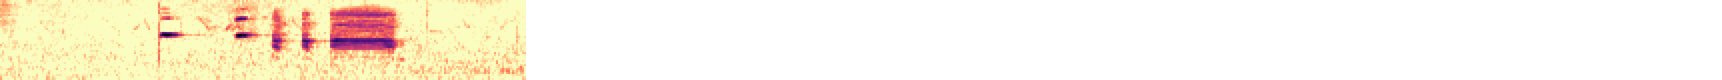
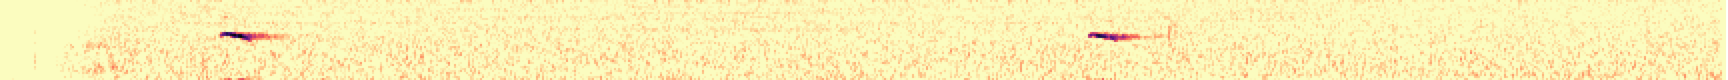
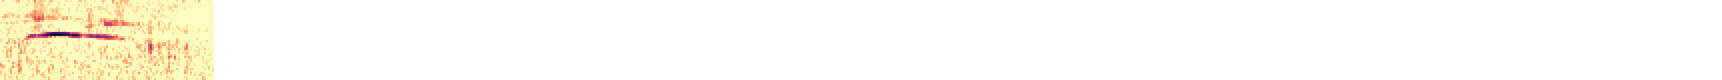
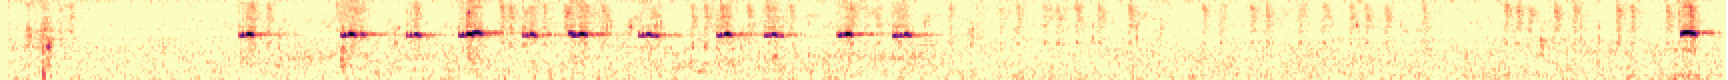
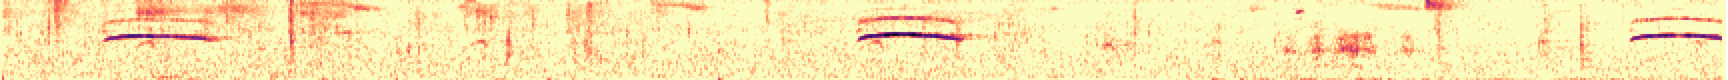
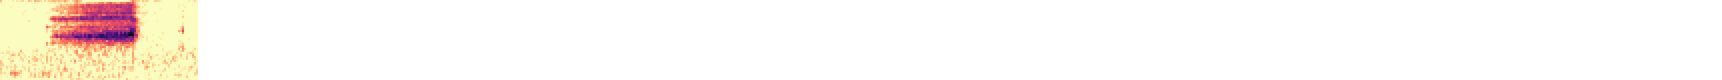
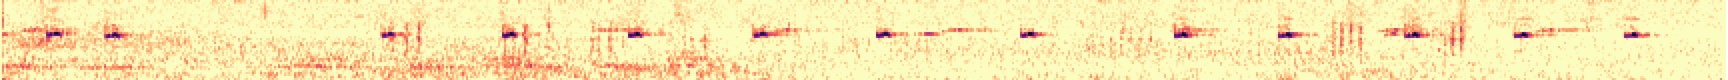
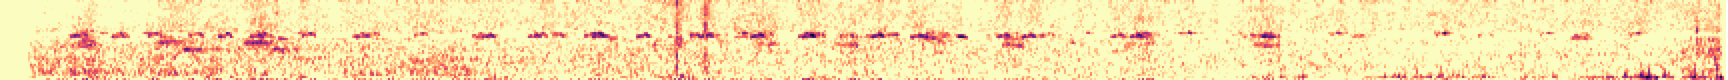
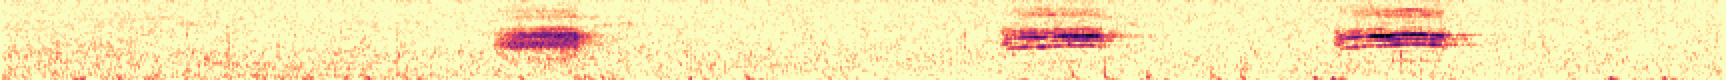
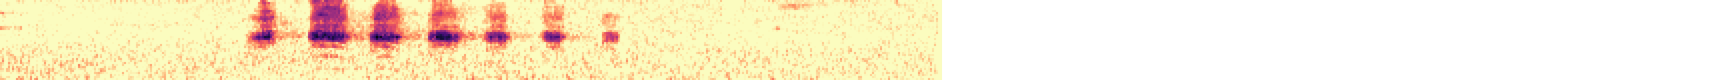

peak memory: 945.91 MiB, increment: 233.45 MiB

In [ ]:
%%memit -c
# Optimize perf
#   - NOTE n_sp=None -> 27035/35233 recs because quality='ab'
opt('warn', use='dask', scheduler='threads')  # Quiet + par + progress bars
# opt('warn', use='sync')
# opt('debug', use='sync')  # Verbose + sync + no progress bars
with ExitStack() as stack:
    stack.enter_context(cache_control(
        tags_fail_on_miss=['rec'],  # Require warmed cache for 'rec' funcs
        tags_refresh=['recs'],  # Measure un-warmed cache for 'recs' funcs
    ))
    display(
        xc_similar_html(
            sp_cols='species',

            # Perf bottlenecks
            #   - meta: O(n) cache hits
            #   - feat: O(n) cache hits
            #   - p:    O(n) sg.search.predict_proba [@cache would achieve perf ~between meta and feat, which is only ~2x speedup]
            # xc_id=381417, n_total=10,   n_sp=1,     # t[4.0s] %m[ 123mb] n_recs[   32,0] p[meta 0.1 feat 0.1 p 0.1]
            # xc_id=381417, n_total=10,   n_sp=10,    # t[7.1s] %m[ 107mb] n_recs[  717,0] p[meta 0.8 feat 1.5 p 0.5]
            xc_id=381417, n_total=10,   n_sp=40,    # t[ 25s] %m[ 300mb] n_recs[ 3879,1] p[meta 3.7 feat 7.6 p 5.1]
            # xc_id=381417, n_total=10,   n_sp=80,    # t[ 51s] %m[ 310mb] n_recs[ 8203,1] p[meta 7.6 feat  18 p  14]
            # xc_id=381417, n_total=10,   n_sp=160,   # t[111s] %m[ 637mb] n_recs[15284,1] p[meta  14 feat  36 p  42]
            # xc_id=381417, n_total=10,   n_sp=None,  # t[192s] %m[1186mb] n_recs[27033,2] p[meta  25 feat  62 p  72]

            view=False,  # For .pipe(n_recs_by_sp_quality): disable html view else junk .species values
        )
        # .pipe(n_recs_by_sp_quality)
    )

to_paths_sliced: [

] |   0% (3) |  0.0s

to_paths_sliced: [

#################################################################################

] | 100% (3) |  0.1s

INFO     [16:40:01.854] [29727] 231 load/audio: {len(recs): 3}

audio: [

] |   0% (3) |  0.0s

INFO     [16:40:01.873] [29727] 536 load/read_audio: Read: cache/audio/xc/data/WTSP/416013/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k)

INFO     [16:40:01.872] [29727] 536 load/read_audio: Read: cache/audio/xc/data/WTSP/415928/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k)

INFO     [16:40:01.874] [29727] 536 load/read_audio: Read: cache/audio/xc/data/WTSP/396365/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k)

audio: [

###########################################################################################

] | 100% (3) |  0.1s

spectro: [

] |   0% (3) |  0.0s

spectro: [

#########################################################################################

] | 100% (3) |  0.1s

plot_slice: [

] |   0% (3) |  0.0s

plot_slice: [

#########################################################                             

] |  66% (3) |  0.1s

plot_slice: [

######################################################################################

] | 100% (3) |  0.2s

xc                                                                                                          xc_id                                                                                                                                        com_name                                                      slice quality                                                               date_time                             type subspecies              background_species                                                    recordist elevation                                                                                                                                                                                                    place                                                                                               remarks bird_seen playback_used  recs_for_sp
0  \n                    <a href="https://www.xeno-canto.org/416013">XC</a>\n                  \n                    <a href="{{ req_href('/recs/xc/similar')(xc_id=416013) }}">416013</a>\n                  \n                    <a href="{{ req_href('/recs/xc/species')(species='WTSP') }}" title="WTSP"  >White-throated Sparrow</a>\n                  df_cell_display(value=<IPython.core.display.HTML object>)       B  \n                2018-03-26<br/>\n                07:30\n                    df_cell_str(value='song')                      df_cell_str(value='')    \n                Bobby Wilcox<br/>by-nc-sa\n                 100 m  df_cell_str(value='\n                Springfield (near  West Springfield), Fairfax County, Virginia, United States<br/>\n                <a href="https://www.google.com/maps/place/38.7877,-77.2332...                                      df_cell_str(value='About 30ft away in a suburban neighborhood.')       yes            no          348
1  \n                    <a href="https://www.xeno-canto.org/415928">XC</a>\n                  \n                    <a href="{{ req_href('/recs/xc/similar')(xc_id=415928) }}">415928</a>\n                  \n                    <a href="{{ req_href('/recs/xc/species')(species='WTSP') }}" title="WTSP"  >White-throated Sparrow</a>\n                  df_cell_display(value=<IPython.core.display.HTML object>)       B  \n                2018-03-26<br/>\n                07:30\n                    df_cell_str(value='song')                      df_cell_str(value='')    \n                Bobby Wilcox<br/>by-nc-sa\n                 100 m  df_cell_str(value='\n                Springfield (near  West Springfield), Fairfax County, Virginia, United States<br/>\n                <a href="https://www.google.com/maps/place/38.7877,-77.2332...                                 df_cell_str(value='About 40ft away in wooded suburban neighborhood.')       yes            no          348
2  \n                    <a href="https://www.xeno-canto.org/396365">XC</a>\n                  \n                    <a href="{{ req_href('/recs/xc/similar')(xc_id=396365) }}">396365</a>\n                  \n                    <a href="{{ req_href('/recs/xc/species')(species='WTSP') }}" title="WTSP"  >White-throated Sparrow</a>\n                  df_cell_display(value=<IPython.core.display.HTML object>)       B  \n                2017-12-18<br/>\n                17:00\n              df_cell_str(value='alarm call')             df_cell_str(value='NOCA BRTH')  \n                Scott Gravette<br/>by-nc-sa\n                 170 m  df_cell_str(value='\n                Wheeler National WR, Limestone County, Alabama, United States<br/>\n                <a href="https://www.google.com/maps/place/34.5649,-86.8393/@34.5649,-86.83...  df_cell_str(value='Flock of White-throated Sparrows going to roost in thicket, giving alarm calls.')       yes            no          348
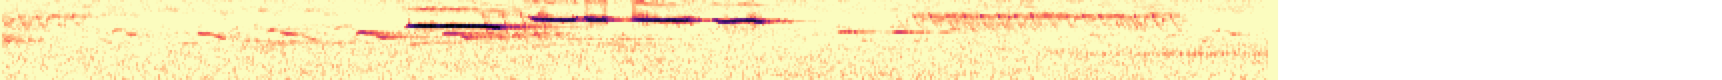
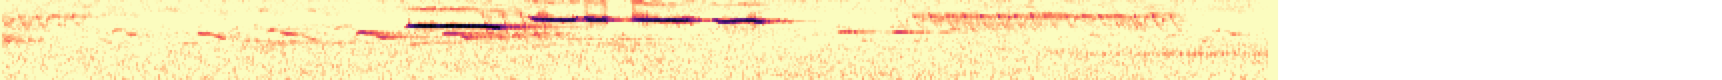
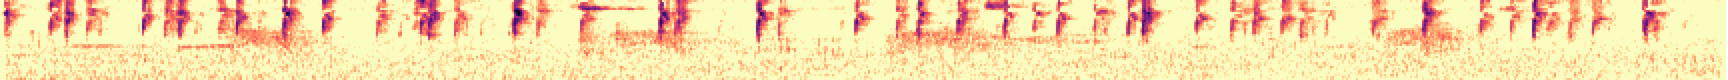

In [ ]:
# Test /species
xc_species_html(species='WTSP', n_recs=3)

to_paths_sliced: [

] |   0% (1) |  0.0s

to_paths_sliced: [

#################################################################################

] | 100% (1) |  0.1s

to_paths_sliced: [

] |   0% (193) |  0.0s

to_paths_sliced: [

###############################################################################

] | 100% (193) |  0.1s

f: [

] |   0% (194) |  0.0s

f: [

#############################################################################################

] | 100% (194) |  0.1s

d_f2: [

] |   0% (194) |  0.0s

d_f2: [

##########################################################################################

] | 100% (194) |  0.1s

d_fc: [

] |   0% (194) |  0.0s

d_fc: [

##########################################################################################

] | 100% (194) |  0.1s

p: [

] |   0% (194) |  0.0s

p: [

] |   0% (194) |  0.1s

p: [

#############################################################################################

] | 100% (194) |  0.2s

d_p2: [

] |   0% (194) |  0.0s

d_p2: [

##########################################################################################

] | 100% (194) |  0.1s

d_pc: [

] |   0% (194) |  0.0s

d_pc: [

##########################################################################################

] | 100% (194) |  0.1s

audio: [

] |   0% (20) |  0.0s

audio: [

] |   0% (20) |  0.1s

audio: [

######################################                                                    

] |  42% (20) |  0.3s

audio: [

##########################################################################################

] | 100% (20) |  0.4s

spectro: [

] |   0% (20) |  0.0s

spectro: [

########################################################################################

] | 100% (20) |  0.1s

plot_slice: [

] |   0% (20) |  0.0s

plot_slice: [

########                                                                             

] |  10% (20) |  0.1s

plot_slice: [

######################################                                               

] |  45% (20) |  0.2s

plot_slice: [

############################################################################         

] |  90% (20) |  0.3s

plot_slice: [

#####################################################################################

] | 100% (20) |  0.4s

xc                                                                                                          xc_id                                                  d_slp                                                  d_f2                                                    d_p2                                                    d_fc                                                   d_pc                                                                                                                                    com_name                                                      slice quality                                                                 date_time                                                  type subspecies                                background_species                                                             recordist elevation                                                                                                                                                                                                    place                                                                                                                                                                                                  remarks bird_seen playback_used  recs_for_sp
0   \n                    <a href="https://www.xeno-canto.org/173272">XC</a>\n                  \n                    <a href="{{ req_href('/recs/xc/similar')(xc_id=173272) }}">173272</a>\n                  <a href="{{ req_query_with(sort='d_slp') }}" >0.0</a>  <a href="{{ req_query_with(sort='d_f2') }}" >0.0</a>    <a href="{{ req_query_with(sort='d_p2') }}" >0.0</a>    <a href="{{ req_query_with(sort='d_fc') }}" >0.0</a>   <a href="{{ req_query_with(sort='d_pc') }}" >0.0</a>   \n                    <a href="{{ req_href('/recs/xc/species')(species='LOSH') }}" title="LOSH"  >Loggerhead Shrike</a>\n                  df_cell_display(value=<IPython.core.display.HTML object>)       A    \n                2012-05-14<br/>\n                13:30\n                  df_cell_str(value='alarm call, female,<br>male')                                        df_cell_str(value='')  \n                Elvis Herrera Rodríguez<br/>by-nc-sa\n                1900 m  df_cell_str(value='\n                Universidad Michoacana university campus, Morelia, Mexico<br/>\n                <a href="https://www.google.com/maps/place/19.689,-101.206/@19.689,-101.206,6z"...                                                                                df_cell_str(value='Urban park. Same individual as XC173271, plus his mate. In response to my<br>presence near the nest.')       yes            no          145
1   \n                    <a href="https://www.xeno-canto.org/406526">XC</a>\n                  \n                    <a href="{{ req_href('/recs/xc/similar')(xc_id=406526) }}">406526</a>\n                  <a href="{{ req_query_with(sort='d_slp') }}" >4.0</a>   <a href="{{ req_query_with(sort='d_f2') }}" >21</a>  <a href="{{ req_query_with(sort='d_p2') }}" >0.054</a>  <a href="{{ req_query_with(sort='d_fc') }}" >0.093</a>   <a href="{{ req_query_with(sort='d_pc') }}" >0.2</a>  \n                    <a href="{{ req_href('/recs/xc/species')(species='ANHU') }}" title="ANHU"  >Anna's Hummingbird</a>\n                  df_cell_display(value=<IPython.core.display.HTML object>)       B    \n                2018-02-24<br/>\n                12:26\n                                         df_cell_str(value='song')                                    df_cell_str(value='BUSH')         \n                Thomas G. Graves<br/>by-nc-sa\n                  90 m  df_cell_str(value='\n                Burleigh Murray State Park, Half Moon Bay, San Mateo County, California, United States<br/>\n                <a href="https://www.google.com/maps/place/37.4515...                                                                                                                                            
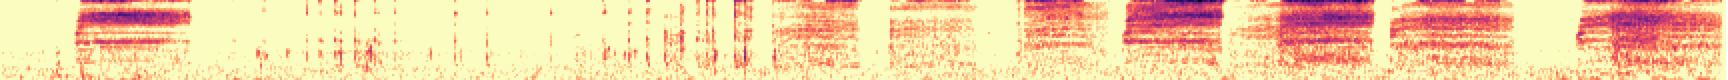
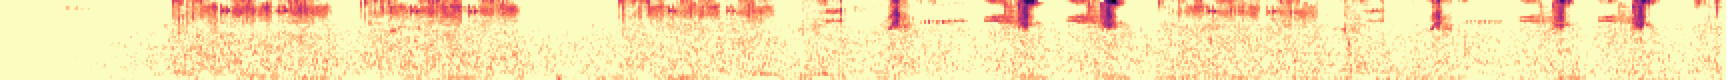
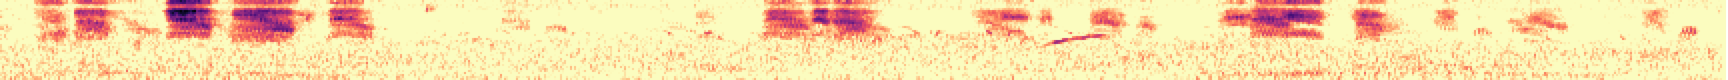
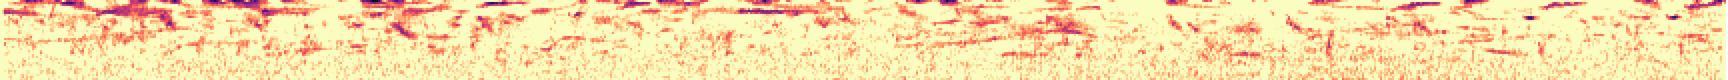
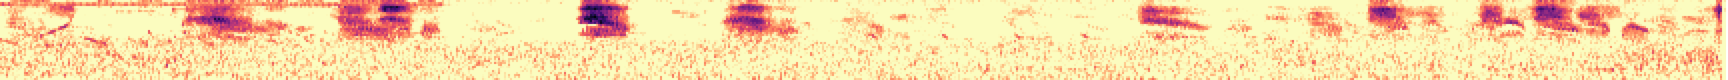
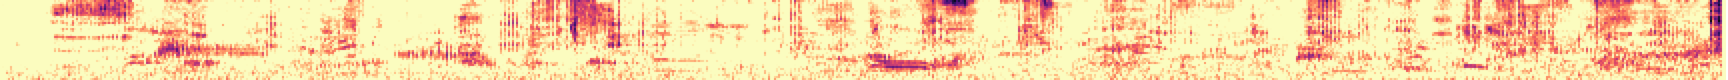
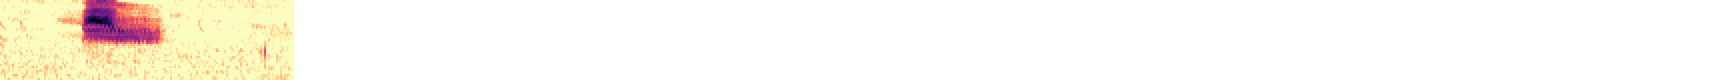
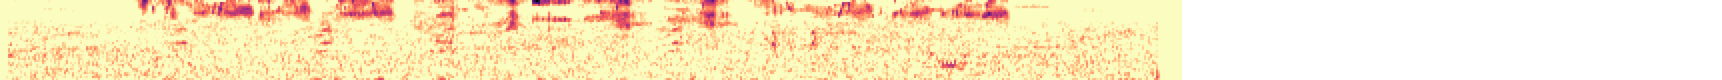
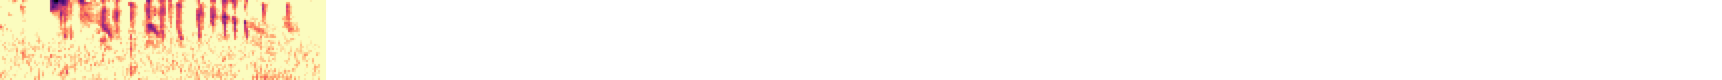
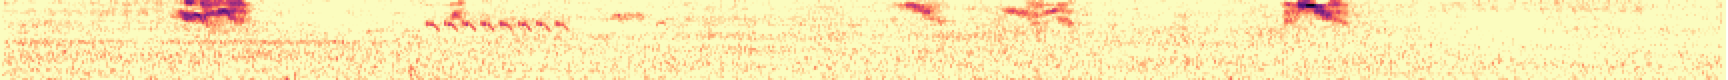
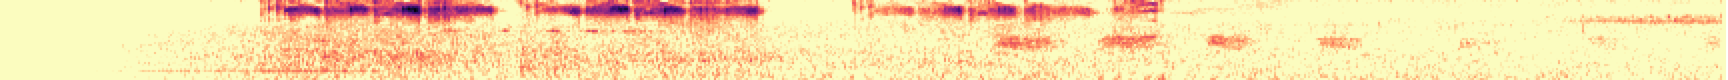
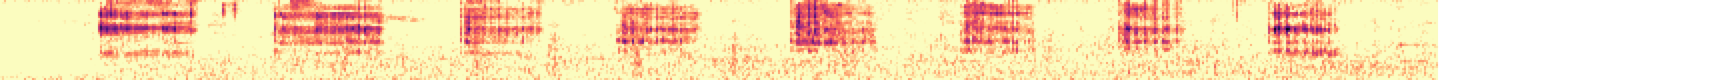
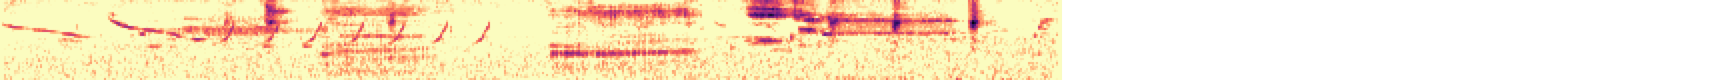
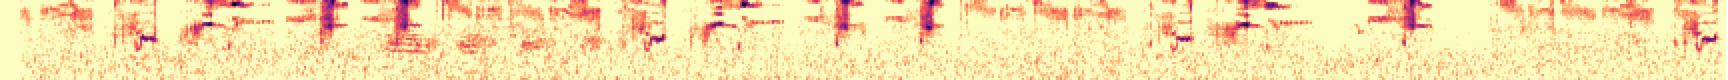
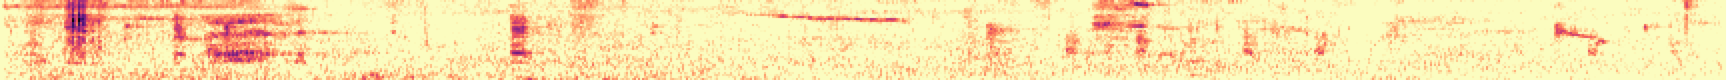
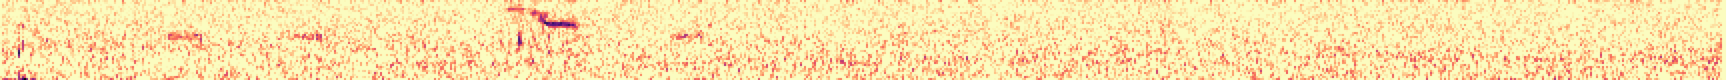
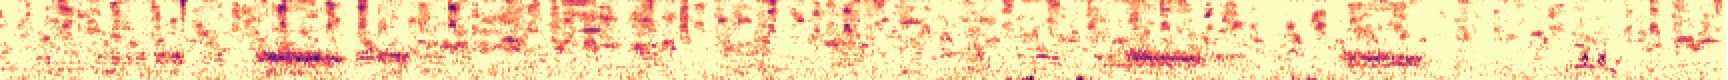
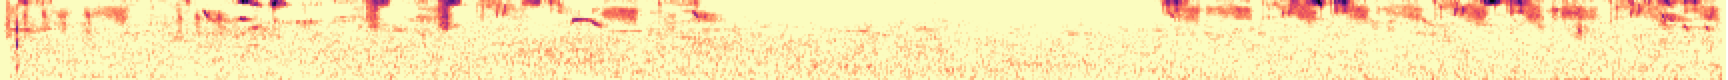
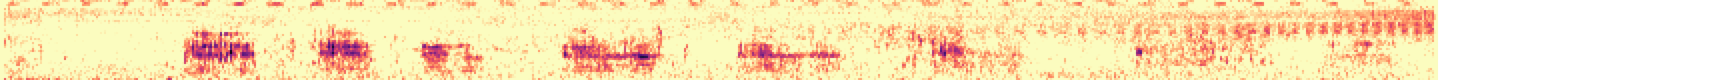
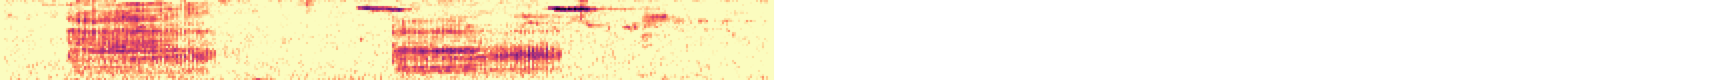

In [ ]:
# Test /similar
opt('warn', use='dask', scheduler='threads')  # Quiet + par + progress bars
xc_similar_html(
    # view=False,
    # n_total=20,
    # n_sp_recs=1,

    # Examples (bad/good)
    # xc_id=381417,  # YHBL (bad)
    xc_id=173272,  # LOSH (bad)
    # xc_id=15222,   # JUTI (bad)
    # xc_id=408021,  # WREN (good)
    # xc_id=348142,  # PSFL (good)
    # xc_id=378376,  # WCSP (good)
    # xc_id=381582,  # COYE (good)
    # xc_id=416558,  # COYE (good)
    # xc_id=329879,  # WTSP (good)

    n_sp=3,
    # n_sp=10,
    # n_sp=20,
    # n_sp=40,
    # n_sp=80,
    # n_sp=160,
    # n_sp=None,

)